# 1. Introduction

Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable) -(jupyter notebook):
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput

Task 3.2 - Compute & list 10 of the top, bottom and most frequent - (jupyter notebook + slide ):
- a. TCP values in the dataset.
- b. RTT values in the dataset.
- c. Throughput values in the dataset.

Task 3.3 - Compute & report - (jupyter notebook + slide ):
- d. The distribution of the average throughput per handset type and provide interpretation for your findings.
- e. The average TCP retransmission view per handset type and provide interpretation for your findings.

Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. - (jupyter notebook + slide)

# 2. Data Preparation

In [18]:
# loading libraries and setting up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max.columns", None)

In [19]:
# loading our dataset from its saved pickle
df = pd.read_pickle('week_2_challenge.pkl')
df.head()

,Bearer Id,IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# 3. Data Analysis

**Task:**- Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable) -(jupyter notebook):
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput

In [20]:
task_3_df = df[['MSISDN/Number', 'Handset Type', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 
                'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
                'TCP UL Retrans. Vol (Bytes)']].copy()

# calculate average Round Trip Time
task_3_df['Avg RTT'] = (task_3_df['Avg RTT DL (ms)'] + task_3_df['Avg RTT UL (ms)']) / 2

# calculate average Throughput
task_3_df['Avg TP'] = (task_3_df['Avg Bearer TP DL (kbps)'] + task_3_df['Avg Bearer TP UL (kbps)']) / 2

# calculate average TCP retransmission
task_3_df['Avg TCP'] = (task_3_df['TCP DL Retrans. Vol (Bytes)'] + task_3_df['TCP UL Retrans. Vol (Bytes)']) / 2

# removing the unnecessary columns
task_3_df.drop(columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
                          'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
                          'TCP UL Retrans. Vol (Bytes)'], inplace = True)

# previewing our dataset
task_3_df.sample(5)

,MSISDN/Number,Handset Type,Avg RTT,Avg TP,Avg TCP
64446,3.366760e+10,Apple iPhone 6S (A1688),37.0,45.5,1.078479e+07
149659,3.365249e+10,Apple iPhone 6S (A1688),20.0,61.0,1.078479e+07
50566,3.366189e+10,Apple iPhone Xr (A2105),27.5,57.5,1.078479e+07
11176,3.361839e+10,Samsung Galaxy A8 (2018),26.0,16237.0,8.632350e+04
46415,3.366630e+10,Huawei P8 Lite,22.5,1306.5,5.167568e+05


In [21]:
# confirming there are no missing values
task_3_df.isna().sum()

MSISDN/Number    0
Handset Type     0
Avg RTT          0
Avg TP           0
Avg TCP          0
dtype: int64

In [22]:
# average TCP retransmission per user
task_3_df.groupby('MSISDN/Number')['Avg TCP'].sum().sort_values(ascending = False)

MSISDN/Number
4.188282e+10    9.052459e+09
3.366773e+10    4.177105e+09
3.365908e+10    3.970930e+09
3.366098e+10    3.687449e+09
3.376128e+10    3.021989e+09
                    ...     
3.360783e+10    7.150000e+01
3.362636e+10    6.700000e+01
3.376206e+10    6.450000e+01
3.361478e+10    6.400000e+01
3.365013e+10    4.850000e+01
Name: Avg TCP, Length: 106857, dtype: float64

In [23]:
# average RTT per user
task_3_df.groupby('MSISDN/Number')['Avg RTT'].sum().sort_values(ascending = False)

MSISDN/Number
4.188282e+10    164763.082362
3.366232e+10     48462.000000
3.366087e+10     32335.000000
3.368369e+10     27424.000000
3.369855e+10     23010.500000
                    ...      
3.365949e+10         2.500000
3.369505e+10         2.000000
3.366020e+10         1.000000
3.366158e+10         0.000000
3.365298e+10         0.000000
Name: Avg RTT, Length: 106857, dtype: float64

In [24]:
# average TP per user
task_3_df.groupby('MSISDN/Number')['Avg TP'].sum().sort_values(ascending = False)

MSISDN/Number
4.188282e+10    9.039117e+06
3.376233e+10    4.511110e+05
3.366871e+10    4.202120e+05
3.365955e+10    3.991710e+05
3.366995e+10    3.454075e+05
                    ...     
3.369859e+10    0.000000e+00
3.365947e+10    0.000000e+00
3.365934e+10    0.000000e+00
3.361064e+10    0.000000e+00
3.377776e+10    0.000000e+00
Name: Avg TP, Length: 106857, dtype: float64

In [25]:
# handset type per user
task_3_df.groupby('MSISDN/Number')['Handset Type'].value_counts().sort_values(ascending = False)

MSISDN/Number  Handset Type                  
4.188282e+10   Huawei B528S-23A                  597
               undefined                          56
               Samsung Galaxy S8 (Sm-G950F)       40
               Samsung Galaxy S7 (Sm-G930X)       23
               Apple iPhone 7 (A1778)             22
                                                ... 
3.366742e+10   Huawei P10                          1
               Samsung Galaxy A3 (Sm-A320)         1
               undefined                           1
               Samsung Galaxy A5 Sm-A520F          1
3.360100e+10   Huawei P20 Lite Huawei Nova 3E      1
Name: Handset Type, Length: 106964, dtype: int64

**Task:** Compute & list 10 of the top, bottom and most frequent:
- TCP values in the dataset.
- RTT values in the dataset.
- Throughput values in the dataset.

In [26]:
# Avg TCP
print("Top 10 average TCP values:")
print(task_3_df['Avg TCP'].sort_values(ascending = False).iloc[:10].values)
print()

print("Bottom 10 average TCP values:")
print(task_3_df['Avg TCP'].sort_values().iloc[:10].values)
print()

print("Most frequent TCP value:")
print(task_3_df['Avg TCP'].value_counts().iloc[:1].values)

Top 10 average TCP values:
[2.17205783e+09 2.15073872e+09 2.14721598e+09 2.14573248e+09
 2.14406043e+09 2.13774586e+09 2.13432368e+09 2.13080802e+09
 2.13008707e+09 2.12732982e+09]

Bottom 10 average TCP values:
[43.  48.5 53.  54.  56.5 64.  64.5 67.  67.  71.5]

Most frequent TCP value:
[85265]


In [27]:
# Avg RTT
print("Top 10 average RTT values:")
print(task_3_df['Avg RTT'].sort_values(ascending = False).iloc[:10].values)
print()

print("Bottom 10 average RTT values:")
print(task_3_df['Avg RTT'].sort_values().iloc[:10].values)
print()

print("Most frequent RTT value:")
print(task_3_df['Avg RTT'].value_counts().iloc[:1].values)

Top 10 average RTT values:
[48462.  32320.5 27906.  27424.  13639.  13150.  12961.  12857.5 12694.
 12369. ]

Bottom 10 average RTT values:
[0.  0.  0.  0.  1.  2.  2.  2.5 3.  3. ]

Most frequent RTT value:
[27801]


In [28]:
# Avg TP
print("Top 10 average TP values:")
print(task_3_df['Avg TP'].sort_values(ascending = False).iloc[:10].values)
print()

print("Bottom 10 average TP values:")
print(task_3_df['Avg TP'].sort_values().iloc[:10].values)
print()

print("Most frequent TP value:")
print(task_3_df['Avg TP'].value_counts().iloc[:1].values)

Top 10 average TP values:
[191131.  156622.  152149.5 150273.  141965.5 140572.  138576.  138102.5
 137026.  134944. ]

Bottom 10 average TP values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Most frequent TP value:
[3886]


**Task:** Compute & report:
- The distribution of the average throughput per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.

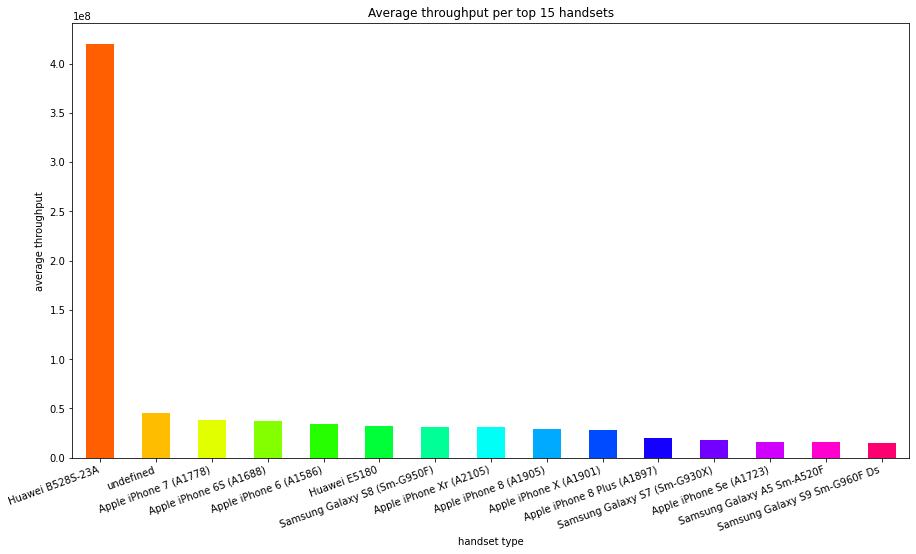

In [29]:
# get average throughput per top 15 handsets
tcp_handsets = task_3_df.groupby('Handset Type')['Avg TP'].sum().sort_values(ascending = False).iloc[:15]

colors = sns.color_palette('hsv', len(tcp_handsets))

plt.figure(figsize = (15, 8))
tcp_handsets.plot(kind = 'bar', rot = '20', color = colors)
plt.xlabel("handset type")
plt.ylabel("average throughput")
plt.title("Average throughput per top 15 handsets")
plt.xticks(ha = 'right')
plt.savefig("average tp per handset.png")
plt.show()

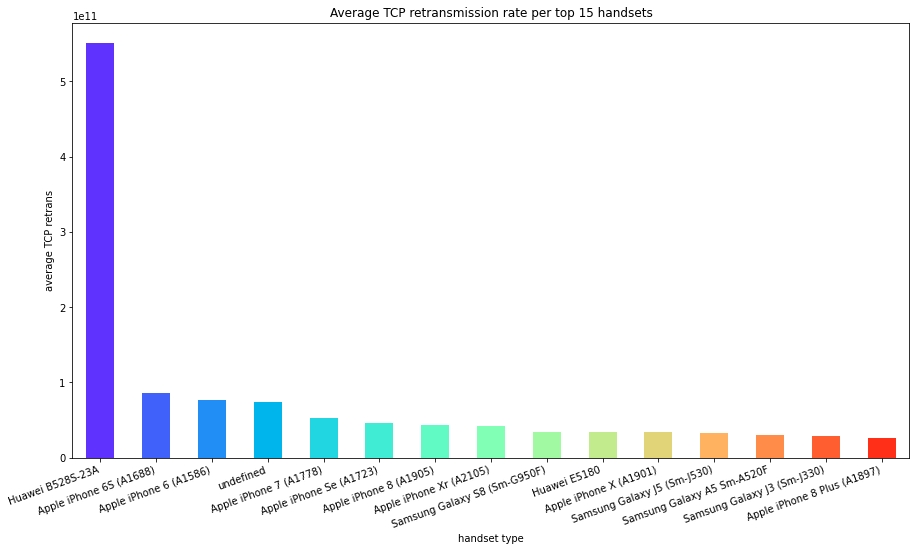

In [30]:
# get average TCP retransmission rate per top 15 handsets
tcp_handsets = task_3_df.groupby('Handset Type')['Avg TCP'].sum().sort_values(ascending = False).iloc[:15]

colors = sns.color_palette('rainbow', len(tcp_handsets))

plt.figure(figsize = (15, 8))
tcp_handsets.plot(kind = 'bar', rot = '20', color = colors)
plt.xlabel("handset type")
plt.ylabel("average TCP retrans")
plt.title("Average TCP retransmission rate per top 15 handsets")
plt.xticks(ha = 'right')
plt.savefig("average tcp per handset.png")
plt.show()

# 4. Data Modeling

**Task:** Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [31]:
# standardizing our dataset first
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cluster_df = task_3_df.copy()
cluster_df.drop(columns = ['MSISDN/Number', 'Handset Type'], inplace = True)

# fit scaler to data
scaled_data = scaler.fit_transform(cluster_df)

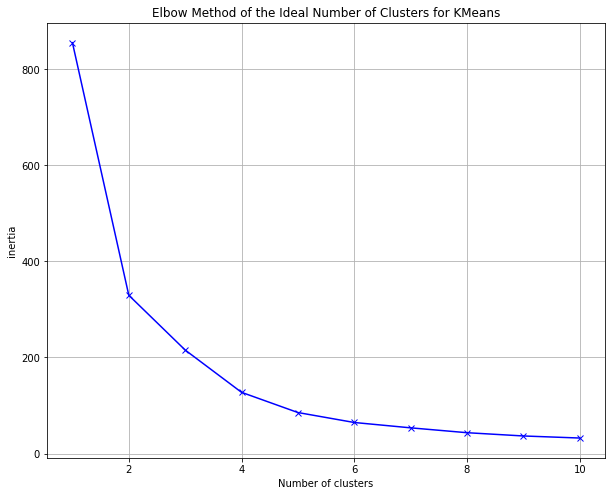

In [32]:
# using the Elbow Method to determine the ideal number of clusters for K-Means
from sklearn.cluster import KMeans

wcss = [] # stands for "Within Cluster Sum of Squares"
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
# visualizing the inertia (WCSS)
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.title("Elbow Method of the Ideal Number of Clusters for KMeans")
plt.grid(True)
plt.savefig("elbow method.png")
plt.show()

From the above elbow method plot, we see that the ideal cluster size to use is 5.

In [33]:
# applying KMeans clustering with k = 5
k5 = KMeans(5)

# fitting to our scaled data
k5.fit(scaled_data)

# getting our clusters
k5_clusters = k5.labels_

# adding the clusters to our dataframe
task_3_df['clusters'] = k5_clusters.astype('object')

# previewing our dataframe
task_3_df.head()

,MSISDN/Number,Handset Type,Avg RTT,Avg TP,Avg TCP,clusters
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,23.500000,33.5,1.078479e+07,0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),35.000000,21.0,1.078479e+07,0
2,3.376063e+10,Samsung Galaxy A8 (2018),63.729294,7.5,1.078479e+07,0
3,3.375034e+10,undefined,63.729294,44.0,1.078479e+07,0
4,3.369980e+10,Samsung Sm-G390F,63.729294,7.5,1.078479e+07,0


In [34]:
# preview distribution of clusters
task_3_df.clusters.value_counts()

0    106719
4     25853
1     14191
2      2990
3       248
Name: clusters, dtype: int64

In [35]:
# save to CSV and in pickle format
task_3_df.to_csv('user_experience_analysis.csv', index = True)
task_3_df.to_pickle('user_experience_analysis.pkl')